In [1]:
import pygmo
import numpy as np

import math
import pylab
import matplotlib.pyplot as plt
import matplotlib.ticker as tic

In [2]:
#вспомогательные функции для отображения... функций

def make_data(f,bounds = [-2,2], n_pt = 100):
    x = np.arange(bounds[0], bounds[1], (bounds[1] - bounds[0])/n_pt)
    y = np.arange(bounds[0], bounds[1], (bounds[1] - bounds[0])/n_pt)
    xgrid, ygrid = np.meshgrid(x, y) 
    grid = np.stack([xgrid,ygrid],axis = -1)

    z = np.zeros_like(xgrid)
    for i in range(len(ygrid)):
        for j in range(len(grid)):
            z[i][j] = f(grid[i][j])
    
    return xgrid, ygrid, z

def plot_function(f, bounds = [-3,3]):
    _, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    x, y, z = make_data(f,bounds = bounds)
    ax.plot_surface(x, y, z)
    plt.show()


In [3]:
def display_comp_table(ct, true_minima_ = None):
    print("name\t| gen\t| opt coords\t\t| opt val\t| err")
    print("-------------------------------------------------------------")
    for elm in ct:
        print(f"{elm[0]}\t| {elm[1]}\t| ({elm[2][0]:.2} {elm[2][1]:.2})\t| {elm[3][0]:.2}\t| {np.abs(true_minima_[0] - elm[2]).round(2)}")
        

In [4]:
def f_1(point: np.array):
    # глоб. минимум 0,0 (0)
    return np.sum(np.power(point, 2), axis = -1)

def f_2(point):
    # глоб. минимум -1,-5 (-26)
    x, y = point
    return x*x + 2*x + x*y*y*x -10*x*y

def grad(func, point, delta = 1e-5):
    delta_x = func(point + (delta, 0)) - func(point)
    delta_y = func(point + (0, delta)) - func(point)
    return np.array([delta_x / delta, delta_y / delta])

f 1 :


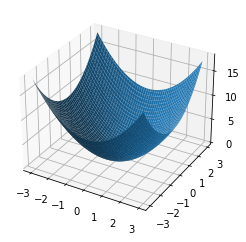

f 2 :


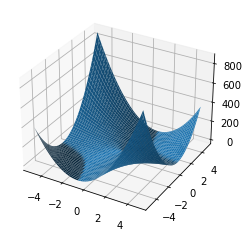

In [5]:
print("f 1 :")
plot_function(f_1)
print("f 2 :")
plot_function(f_2, bounds = [-5,5])

## Создание класса кастомной проблемы

In [6]:
class function_extrem_problem():
    def __init__(self, func):
        self.func = func
        
    def fitness(self, dv : np.array):
        return [self.func(dv)]
    
    def get_bounds(self):
        return ([-5, -5],
                [5, 5])

### Оптимизация первой функции

In [7]:
prob = pygmo.problem(function_extrem_problem(f_1))
comp_table = []

##### Решение с помощью *simple genetic algoritm*

In [8]:
algo = pygmo.algorithm(pygmo.sga(gen = 1000))
algo.set_verbosity(50)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)

In [9]:
uda = algo.extract(pygmo.sga)
uda.get_log()

[(1, 20, 1.7966000210801774, -0.45718950460803764),
 (51, 1020, 0.046168716099951226, 0.03803982250708923),
 (101, 2020, 0.005012124354235477, 0.0),
 (151, 3020, 0.0017364785667560324, 0.0),
 (201, 4020, 0.0016996098239454509, 0.0),
 (251, 5020, 0.0016996098239454509, 0.0),
 (301, 6020, 0.0016996098239454509, 0.0),
 (351, 7020, 0.0016996098239454509, 0.0),
 (401, 8020, 0.0016996098239454509, 0.0),
 (451, 9020, 0.0016996098239454509, 0.0),
 (501, 10020, 0.0016996098239454509, 0.0),
 (551, 11020, 0.0016996098239454509, 0.0),
 (601, 12020, 6.629683826991928e-05, 0.0),
 (651, 13020, 6.629683826991928e-05, 0.0),
 (701, 14020, 6.629683826991928e-05, 0.0),
 (751, 15020, 6.629683826991928e-05, 0.0),
 (801, 16020, 6.629683826991928e-05, 0.0),
 (851, 17020, 6.629683826991928e-05, 0.0),
 (901, 18020, 6.629683826991928e-05, 0.0),
 (951, 19020, 6.629683826991928e-05, 0.0)]

In [10]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["sga", 1000, pop.champion_x, pop.champion_f])

[6.62968383e-05]
[ 0.00149016 -0.00800476]


##### Решение с помощью bee colony

In [11]:
algo = pygmo.algorithm(pygmo.bee_colony(gen = 100, limit = 20))
algo.set_verbosity(5)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)

In [12]:
uda = algo.extract(pygmo.bee_colony)
uda.get_log()

[(1, 40, 0.04863382873484953, 0.04863382873484953),
 (6, 240, 0.00016628826960628722, 0.00016628826960628722),
 (11, 440, 6.936918313547467e-06, 6.936918313547467e-06),
 (16, 640, 6.936918313547467e-06, 6.936918313547467e-06),
 (21, 840, 8.419588098930183e-08, 8.419588098930183e-08),
 (26, 1040, 8.155163305720652e-08, 8.155163305720652e-08),
 (31, 1240, 8.681924319882138e-09, 8.681924319882138e-09),
 (36, 1440, 1.0860114721115313e-09, 1.0860114721115313e-09),
 (41, 1640, 6.675636850922626e-11, 6.675636850922626e-11),
 (46, 1840, 4.4254551616841794e-12, 4.4254551616841794e-12),
 (51, 2040, 9.49032743905487e-13, 9.49032743905487e-13),
 (56, 2240, 1.927163811416659e-13, 1.927163811416659e-13),
 (61, 2440, 8.301870900736461e-15, 8.301870900736461e-15),
 (66, 2640, 2.0272252432888751e-16, 2.0272252432888751e-16),
 (71, 2840, 9.121407254753216e-19, 9.121407254753216e-19),
 (76, 3040, 1.6381725343574113e-19, 1.6381725343574113e-19),
 (81, 3240, 3.09758237264994e-20, 3.09758237264994e-20),
 (8

In [13]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["bee", 100, pop.champion_x, pop.champion_f])

[2.53958734e-26]
[-2.29939245e-14  1.57693224e-13]


##### Решение с помощью grey wolf optimiser

In [14]:
algo = pygmo.algorithm(pygmo.gwo(gen = 100))
algo.set_verbosity(5)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)

In [15]:
uda = algo.extract(pygmo.gwo)
uda.get_log()

[(1, 0.46315978080027204, 0.7374418211607394, 1.2399857187636116),
 (6, 0.0003880648519403118, 0.0003896322237910397, 0.0005030863051378424),
 (11, 8.749058621821555e-08, 1.9994934504136347e-07, 2.3014005446348643e-07),
 (16, 3.3666171392045655e-11, 4.022291388079956e-11, 4.3164474540725195e-11),
 (21, 8.324126122996916e-16, 3.2410541106703075e-15, 4.356168284643048e-15),
 (26, 4.036470659451458e-20, 2.175735522626927e-19, 4.2822601150044533e-19),
 (31, 6.314893072413881e-23, 7.548519516898929e-23, 8.903707130012231e-23),
 (36, 7.7921385441957925e-28, 2.7906500908984357e-27, 3.922675197337198e-27),
 (41, 4.475930076947553e-34, 5.096215789203806e-33, 6.329670608716989e-33),
 (46, 7.098614984325329e-38, 1.3449867260743268e-37, 2.490391490429126e-37),
 (51, 2.514327466221555e-43, 3.2140204192251832e-43, 3.708521535684518e-43),
 (56, 1.860235686180235e-49, 5.138697806584789e-49, 6.307400693581148e-49),
 (61, 1.6166427409906457e-55, 3.178179806027194e-55, 3.1786353166771972e-55),
 (66, 1.76

In [16]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["auf", 100, pop.champion_x, pop.champion_f])

[3.20885771e-80]
[-1.30990095e-40 -1.22189083e-40]


#### Сравнение результатов

In [20]:
display_comp_table(comp_table, true_minima_ = np.array([0,0]))

name	| gen	| opt coords		| opt val	| err
-------------------------------------------------------------
sga	| 1000	| (0.0015 -0.008)	| 6.6e-05	| [0.   0.01]
bee	| 100	| (-2.3e-14 1.6e-13)	| 2.5e-26	| [0. 0.]
auf	| 100	| (-1.3e-40 -1.2e-40)	| 3.2e-80	| [0. 0.]


### Оптимизация второй функции

In [7]:
prob = pygmo.problem(function_extrem_problem(f_2))
comp_table = []

##### Решение с помощью *simple genetic algoritm*

In [8]:
algo = pygmo.algorithm(pygmo.sga(gen = 1000))
algo.set_verbosity(50)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)

In [9]:
uda = algo.extract(pygmo.sga)
uda.get_log()

[(1, 20, -25.73673764688959, -8.544207827569107),
 (51, 1020, -25.8621262040924, 0.0),
 (101, 2020, -25.8621262040924, 0.0),
 (151, 3020, -25.864127415980164, 0.0),
 (201, 4020, -25.864127415980164, 0.0),
 (251, 5020, -25.864127415980164, 0.0),
 (301, 6020, -25.864127415980164, 0.0),
 (351, 7020, -25.864127415980164, 0.0),
 (401, 8020, -25.86417466396035, 0.0),
 (451, 9020, -25.898134445076792, 0.0),
 (501, 10020, -25.898134445076792, 0.0),
 (551, 11020, -25.898134445076792, 0.0),
 (601, 12020, -25.898134445076792, 0.0),
 (651, 13020, -25.898134445076792, 0.0),
 (701, 14020, -25.898168732724866, 0.0),
 (751, 15020, -25.898168732724866, 0.0),
 (801, 16020, -25.898168732724866, 0.0),
 (851, 17020, -25.898168732724866, 0.0),
 (901, 18020, -25.898168732724866, 0.0),
 (951, 19020, -25.898168732724866, 0.0)]

In [10]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["sga", 1000, pop.champion_x, pop.champion_f])

[-25.89816873]
[-1.31910556 -3.79174002]


##### Решение с помощью *bee colony*

In [11]:
algo = pygmo.algorithm(pygmo.bee_colony(gen = 1000, limit = 20))
algo.set_verbosity(50)
pop = pygmo.population(prob, 20)

In [12]:
pop = algo.evolve(pop)

In [13]:
uda = algo.extract(pygmo.bee_colony)
uda.get_log()

[(1, 40, -22.594959864297167, -22.594959864297167),
 (51, 2040, -25.99751386982845, -25.98246568527217),
 (101, 4040, -25.999199508736588, -25.989302924946728),
 (151, 6040, -25.999199508736588, -25.68049911510797),
 (201, 8040, -25.999199508736588, -25.615177517688387),
 (251, 10040, -25.999199508736588, -25.996857529924732),
 (301, 12040, -25.999199508736588, -21.309041111765012),
 (351, 14040, -25.999199508736588, -25.99517678646354),
 (401, 16040, -25.999199508736588, -25.99211999411933),
 (451, 18040, -25.999199508736588, -25.94519293358958),
 (501, 20040, -25.999199508736588, -24.002610205663743),
 (551, 22040, -25.9993165964428, -25.9993165964428),
 (601, 24040, -25.9993165964428, -20.958907825228813),
 (651, 26040, -25.9993165964428, -25.83775519720673),
 (701, 28040, -25.9993165964428, -25.95832692065375),
 (751, 30040, -25.9993165964428, -25.978590449620434),
 (801, 32040, -25.9993165964428, -25.98842676379941),
 (851, 34040, -25.9993165964428, -20.99167518128459),
 (901, 360

In [14]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["bee", 1000, pop.champion_x, pop.champion_f])

[-25.9993166]
[-1.02500214 -4.88548761]


##### Решение с помощью grey wolf optimiser

In [15]:
algo = pygmo.algorithm(pygmo.gwo(gen = 1000))
algo.set_verbosity(50)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)

In [16]:
uda = algo.extract(pygmo.gwo)
uda.get_log()

[(1, -7.166543862304138, -6.357299420343918, -5.846250725482138),
 (51, -22.153840035527452, -22.15383602150225, -22.153812465266075),
 (101, -22.153845721320398, -22.153840035527452, -22.15383602150225),
 (151, -22.153845721320398, -22.153845430382265, -22.153840035527452),
 (201, -22.153845721320398, -22.153845430382265, -22.153840035527452),
 (251, -22.153846146564856, -22.153845721320398, -22.153845430382265),
 (301, -22.153846146564856, -22.153845721320398, -22.153845430382265),
 (351, -22.153846146564856, -22.153845721320398, -22.153845430382265),
 (401, -22.153846146564856, -22.153845721320398, -22.153845430382265),
 (451, -22.153846146564856, -22.153846042471923, -22.153845721320398),
 (501, -22.153846146564856, -22.153846042471923, -22.153845721320398),
 (551, -22.153846146564856, -22.153846042471923, -22.153845721320398),
 (601, -22.153846146564856, -22.153846042471923, -22.153845721320398),
 (651, -22.153846146564856, -22.153846104692338, -22.153846042471923),
 (701, -22.153

In [17]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["auf", 1000, pop.champion_x, pop.champion_f])

[-24.59518426]
[-0.83415811 -4.58715262]


#### Сравнение результатов

In [28]:
display_comp_table(comp_table, true_minima_ = [np.array([-1,-5])])

name	| gen	| opt coords		| opt val	| err
-------------------------------------------------------------
sga	| 1000	| (-1.3 -3.8)		| -2.6e+01	| [0.32 1.21]
bee	| 1000	| (-1.0 -4.9)		| -2.6e+01	| [0.03 0.11]
auf	| 1000	| (-0.83 -4.6)		| -2.5e+01	| [0.17 0.41]
